---
---
---
---
---
---
---
---
---
---

#  *`Machine Learning Project`*

--- by Kashish Khanna (S3773998)

---
---
---
---
---
---
---
---
---
---

# Table of Contents

- **[Introduction](#intro)**<br><br>
- **[Data-Set](#dataset)**<br><br>
- **[Loading the Libraries](#library)**<br><br>
- **[Reading the Dataset in](#data)**<br><br>
- **[Data Preparation](#prep)**
1. [Summary Statistics](#stats)
2. [Correlation Matrix](#corr)
3. [Checking Missing Values](#missing)
4. [Counting Unique Values](#unique)<br><br>
- **[Data Cleaning](#clean)**
- [Dropping Rows with missing values](#drop)
- [Dealing with Outliers](#outlier)<br><br>
- **[Data Preprocessing](#preprocess)**<br><br>
- **[Data Exploration](#explore)**<br><br>
- **[Feature Selection and Ranking](#feature)**<br><br>
- **[Spliting Data into Training and Test Sets](#sdtts)**<br><br>
- **[Model Fitting](#fit)**
- [K-Nearest Neighbors (KNN)](#knn1)
- [(Gaussian) Naive Bayes (NB)](#nb1)
- [Decision Trees(DT)](#dt1)<br><br>
- **[Model Evaluation Strategy](#eval)**<br><br>
- **[Hyperparameter Tuning](#tune)**
- [K-Nearest Neighbors (KNN)](#knn)
- [(Gaussian) Naive Bayes (NB)](#nb)
- [Decision Trees(DT)](#dt)<br><br>
- **[Performance Comparison](#pc)**<br><br>
- **[Discussion](#discuss)**<br><br>
- **[References](#refer)**

# Introduction <a> </a>

A certain premium club boasts a large customer membership. The members pay an annual membership fee in return for using the exclusive facilities offered by this club. The fees are customized for every member's personal package. Some Customers have customised package which suits thier needs and are specially designed for them keeping into consideration thier status we assume is indirectly signified by keeping thier annual income into consideration.

In the last few years, however, the club has been facing an issue with a lot of members cancelling their memberships which are shown by the `MEMBERSHIP_STATUS` followed by the `START_DATE` and `END_DATE` of the Memberships. `END_DATE` column provides the dates when the membership was cancelled else if the membership is continued it is labelled as &gt; INFORCE&gt;  in the `MEMBERSHIP_STATUS`, hence, `END_DATE` does not show any date.

The club management plans to address this issue by proactively addressing customer grievances. They, however, do not have enough bandwidth to reach out to the entire customer base individually and are looking to see whether a statistical approach can help them identify customers at risk.

# Data-Set <a> </a>

&gt;
&gt; `MEMBERSHIP_TERM_YEARS` - Member Services Duration

&gt; `MEMBER_AGE_AT_ISSUE` - Age of members when, Cancelled or Enforced 

&gt; `ADDITIONAL_MEMBERS` - Add-In Members

&gt; `START_DATE` - The starting date of members using Club Services

&gt; `ANNUAL_FEES` - Annual Fees of the Club Services 

&gt; `MEMBER_ANNUAL_INCOME` - Annual Income of Members

&gt; `MEMBER_OCCUPATION_CD` - Occupation of Members

&gt; `END_DATE` - The Ending Dates of Members using Club Services

&gt; `MEMBERSHIP_NUMBER` - Member IDs (Unique/ ID Columns of the dataset)

&gt; `MEMBER_MARITAL_STATUS` - Member Marriage status( Single, Divorced, Married, Widowed )

&gt; `MEMBER_GENDER` - Gender of the Members 

&gt; `MEMBERSHIP_PACKAGE` - Club's Package for the Members  

&gt; `PAYMENT_MODE` - Single-Premium, Annual, Semi-Annual, Quarterly, Monthly 

&gt; `AGENT_CODE` - Agent ID of the Agents from which the Member joined the Club

&gt; `MEMBERSHIP_STATUS` - *Cancelled*, (Active) *Inforced* (Target Labels) where cancelled is the Positive Class in order to understand(analyse) the customers at risk.  ***( Our Target Variable )***

# Loading the Libraries <a> </a>

In [1]:
#!pip install --upgrade altair

#!pip install vega vega_datasets

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
import altair as alt
alt.renderers.enable('notebook') # required in Jupyter notebooks
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Reading the dataset in <a> </a>

In [2]:
data = pd.read_csv('S3773998_Data.csv')

In [3]:
data.head(10)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,NaN
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,NaN
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,NaN
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,NaN
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,NaN
5,A00006,12,110000.0,NaN,NaN,NaN,1.0,TYPE-B,48,3,ANNUAL,5311,INFORCE,20070215,NaN
6,A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,20070221,NaN
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,20070312,20090811.0
8,A00009,35,120000.0,NaN,NaN,NaN,1.0,TYPE-B,35,2,MONTHLY,4522,INFORCE,20070316,NaN
9,A00010,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,20070330,NaN


# Data Preparation <a> </a>

## Summary Statistics <a> </a>

In [4]:
data.describe(include = 'all')

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
count,10362,10362.000000,1.036200e+04,7765,9751,8.608000e+03,10319.000000,10362,10362.000000,10362.000000,10362,10362,10362,1.036200e+04,3.143000e+03
unique,10362,NaN,NaN,4,2,NaN,NaN,2,NaN,NaN,5,4317,2,NaN,NaN
top,A05982,NaN,NaN,M,M,NaN,NaN,TYPE-B,NaN,NaN,ANNUAL,343344,INFORCE,NaN,NaN
freq,1,NaN,NaN,6430,7330,NaN,NaN,6809,NaN,NaN,6589,612,7219,NaN,NaN
mean,NaN,29.395001,1.788122e+05,NaN,NaN,1.451100e+06,1.711019,NaN,46.798494,1.412276,NaN,NaN,NaN,2.010828e+07,2.011390e+07
std,NaN,22.427712,2.688747e+05,NaN,NaN,1.757174e+07,1.453960,NaN,13.897085,1.145136,NaN,NaN,NaN,1.719666e+04,1.378483e+04
min,NaN,9.000000,0.000000e+00,NaN,NaN,9.996000e+03,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,2.006091e+07,2.007083e+07
25%,NaN,12.000000,1.000000e+05,NaN,NaN,3.999960e+05,1.000000,NaN,37.000000,0.000000,NaN,NaN,NaN,2.009123e+07,2.010122e+07
50%,NaN,19.000000,1.182093e+05,NaN,NaN,5.499960e+05,1.000000,NaN,46.000000,1.000000,NaN,NaN,NaN,2.010123e+07,2.011113e+07
75%,NaN,37.000000,1.900000e+05,NaN,NaN,9.999960e+05,2.000000,NaN,57.000000,2.000000,NaN,NaN,NaN,2.012123e+07,2.013012e+07


## Correlation Matrix <a> </a>

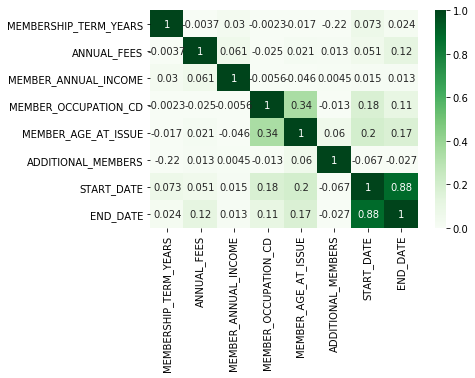

In [5]:
sns.heatmap(data.corr(method = 'pearson'), cmap='Greens', annot = True, vmin = 0, vmax = 1)

In the correlation matrix above we find some correlation in columns:
1. START_DATE and END_DATE
2. START_DATE and ANNUAL_FEES
3. START_DATE and MEMBER_OCCUPATION_CD
4. MEMBER_ANNUAL_INCOME and ANNUAL_FEES
5. END_DATE and ANNUAL_FEES
6. MEMBER_OCCUPATION_CD and MEMBER_AGE_AT_ISSUE

    

We will neglect the correlations with START_DATE and END_DATE because we will remove the columns as the information is already provided by the MEMBERSHIP_STATUS of the club's customers. Hence, we will keep the other correlations into consideration.

In [6]:
data.shape

(10362, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      10362 non-null  object 
 1   MEMBERSHIP_TERM_YEARS  10362 non-null  int64  
 2   ANNUAL_FEES            10362 non-null  float64
 3   MEMBER_MARITAL_STATUS  7765 non-null   object 
 4   MEMBER_GENDER          9751 non-null   object 
 5   MEMBER_ANNUAL_INCOME   8608 non-null   float64
 6   MEMBER_OCCUPATION_CD   10319 non-null  float64
 7   MEMBERSHIP_PACKAGE     10362 non-null  object 
 8   MEMBER_AGE_AT_ISSUE    10362 non-null  int64  
 9   ADDITIONAL_MEMBERS     10362 non-null  int64  
 10  PAYMENT_MODE           10362 non-null  object 
 11  AGENT_CODE             10362 non-null  object 
 12  MEMBERSHIP_STATUS      10362 non-null  object 
 13  START_DATE             10362 non-null  int64  
 14  END_DATE               3143 non-null   float64
dtypes:

## Checking Missing Values <a> </a>

In [8]:
data.isna().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE                  0
END_DATE                 7219
dtype: int64

## Counting Unique Values <a> </a>

In [9]:
print(data['MEMBER_MARITAL_STATUS'].value_counts())

M    6430
S    1144
W     146
D      45
Name: MEMBER_MARITAL_STATUS, dtype: int64


In [10]:
print(data['MEMBER_GENDER'].value_counts())

M    7330
F    2421
Name: MEMBER_GENDER, dtype: int64


In [11]:
print(data['MEMBER_OCCUPATION_CD'].value_counts())

1.0    7281
2.0    1778
6.0     728
5.0     324
4.0     207
3.0       1
Name: MEMBER_OCCUPATION_CD, dtype: int64


In [12]:
print(data['MEMBERSHIP_PACKAGE'].value_counts())

TYPE-B    6809
TYPE-A    3553
Name: MEMBERSHIP_PACKAGE, dtype: int64


In [13]:
print(data['MEMBER_AGE_AT_ISSUE'].value_counts())

47    313
43    306
40    301
46    294
41    291
     ... 
92      1
5       1
14      1
16      1
90      1
Name: MEMBER_AGE_AT_ISSUE, Length: 89, dtype: int64


In [14]:
print(data['ADDITIONAL_MEMBERS'].value_counts())

0    3050
3    2488
1    2478
2    2346
Name: ADDITIONAL_MEMBERS, dtype: int64


In [15]:
print(data['PAYMENT_MODE'].value_counts())

ANNUAL            6589
MONTHLY           1881
SEMI-ANNUAL       1493
QUARTERLY          390
SINGLE-PREMIUM       9
Name: PAYMENT_MODE, dtype: int64


In [16]:
print(data['AGENT_CODE'].value_counts())

343344     612
348355     118
343477      95
343466      63
309877      63
          ... 
348711       1
144355       1
229911       1
271922       1
1449688      1
Name: AGENT_CODE, Length: 4317, dtype: int64


In [17]:
print(data['MEMBERSHIP_STATUS'].value_counts())

INFORCE      7219
CANCELLED    3143
Name: MEMBERSHIP_STATUS, dtype: int64


# Data Cleaning <a> </a>

In [18]:
data['END_DATE'] = data['END_DATE'].fillna(-1)
data['END_DATE'] = data['END_DATE'].astype(int)
data['START_DATE'] = data['START_DATE'].astype(str)
data['END_DATE'] = data['END_DATE'].astype(str)
data['END_DATE'] = data['END_DATE'].replace('-1', np.nan)

In [19]:
from datetime import datetime
data['END_DATE'] = pd.to_datetime(data['END_DATE'], format='%Y%m%d')
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%Y%m%d')

data['START_DATE'] = data['START_DATE'].astype(str)

In [20]:
data.head(10)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,2006-09-14,NaT
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,2006-11-02,NaT
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,2007-01-24,NaT
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,2007-01-22,NaT
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,2007-01-31,NaT
5,A00006,12,110000.0,NaN,NaN,NaN,1.0,TYPE-B,48,3,ANNUAL,5311,INFORCE,2007-02-15,NaT
6,A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,2007-02-21,NaT
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,2007-03-12,2009-08-11
8,A00009,35,120000.0,NaN,NaN,NaN,1.0,TYPE-B,35,2,MONTHLY,4522,INFORCE,2007-03-16,NaT
9,A00010,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,2007-03-30,NaT


In [21]:
# import matplotlib.pyplot as plt
# plt.boxplot(data3['MEMBER_ANNUAL_INCOME'])
# plt.show()

&gt; ***We have 7219 members who are having their membership still in place, hence the end date for such members is not listed. Therefore, we would replace the missing values (which are not considered missing) in the `END_DATE` column with "1"***

In [22]:
data['END_DATE'] = data['END_DATE'].replace({np.nan:1})

&gt; ***We hold missing values in columns: `MEMBER_MARITAL_STATUS`, `MEMBER_GENDER`, `MEMBER_ANNUAL_INCOME` and `MEMBER_OCCUPATION_CD`***

We cannot deal with the missing values in the `MEMBER_ANNUAL_INCOME` as imputing them would be a wrong approach as it might induce biasness.

### Dropping Rows with missing values <a> </a>

In [23]:
data1 = data.dropna()

In [24]:
data1.head(10)

,MEMBERSHIP_NUMBER,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,A00001,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,2006-09-14,1
1,A00002,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,2006-11-02,1
2,A00003,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,2007-01-24,1
3,A00004,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,2007-01-22,1
4,A00005,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,2007-01-31,1
6,A00007,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,2007-02-21,1
7,A00008,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,2007-03-12,2009-08-11 00:00:00
9,A00010,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,2007-03-30,1
10,A00011,12,1000000.0,M,M,5047008.0,1.0,TYPE-B,38,3,ANNUAL,11933,INFORCE,2007-03-30,1
11,A00012,39,100000.0,M,M,3600000.0,1.0,TYPE-B,35,3,ANNUAL,9499,INFORCE,2007-03-30,1


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MEMBERSHIP_NUMBER      7275 non-null   object 
 1   MEMBERSHIP_TERM_YEARS  7275 non-null   int64  
 2   ANNUAL_FEES            7275 non-null   float64
 3   MEMBER_MARITAL_STATUS  7275 non-null   object 
 4   MEMBER_GENDER          7275 non-null   object 
 5   MEMBER_ANNUAL_INCOME   7275 non-null   float64
 6   MEMBER_OCCUPATION_CD   7275 non-null   float64
 7   MEMBERSHIP_PACKAGE     7275 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    7275 non-null   int64  
 9   ADDITIONAL_MEMBERS     7275 non-null   int64  
 10  PAYMENT_MODE           7275 non-null   object 
 11  AGENT_CODE             7275 non-null   object 
 12  MEMBERSHIP_STATUS      7275 non-null   object 
 13  START_DATE             7275 non-null   object 
 14  END_DATE               7275 non-null   object 
dtypes: 

We removed the missing values because imputing them might make our data biased. Therefore, we have 7275 instances left after dropping missing values. 

In [26]:
print(data1['MEMBERSHIP_NUMBER'].value_counts())

A05982    1
A00977    1
A07152    1
A01079    1
A08094    1
         ..
A10129    1
A04964    1
A02172    1
A02539    1
A09093    1
Name: MEMBERSHIP_NUMBER, Length: 7275, dtype: int64


We have Membership_Number which have constant features (that have only one unique value). Such features are also irrelevant for machine learning, so they need to be removed as follows.

In [27]:
del data1['MEMBERSHIP_NUMBER']

In [28]:
data1.head(10)

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,29,113125.0,M,M,25200000.0,1.0,TYPE-B,45,2,ANNUAL,477,INFORCE,2006-09-14,1
1,38,112220.0,M,M,10339200.0,1.0,TYPE-B,36,3,QUARTERLY,255,INFORCE,2006-11-02,1
2,12,100000.0,M,M,14400000.0,1.0,TYPE-B,42,1,ANNUAL,7866,INFORCE,2007-01-24,1
3,12,100000.0,M,M,9000000.0,1.0,TYPE-B,39,2,ANNUAL,200533,INFORCE,2007-01-22,1
4,46,100000.0,M,M,4800000.0,1.0,TYPE-B,27,2,QUARTERLY,6988,INFORCE,2007-01-31,1
6,36,100000.0,M,M,24000000.0,1.0,TYPE-B,39,2,ANNUAL,4055,INFORCE,2007-02-21,1
7,12,120000.0,M,M,3600000.0,1.0,TYPE-B,28,1,QUARTERLY,13100,CANCELLED,2007-03-12,2009-08-11 00:00:00
9,33,102700.0,M,M,14400000.0,1.0,TYPE-B,42,2,SEMI-ANNUAL,11266,INFORCE,2007-03-30,1
10,12,1000000.0,M,M,5047008.0,1.0,TYPE-B,38,3,ANNUAL,11933,INFORCE,2007-03-30,1
11,39,100000.0,M,M,3600000.0,1.0,TYPE-B,35,3,ANNUAL,9499,INFORCE,2007-03-30,1


### Dealing with Outliers <a> </a>

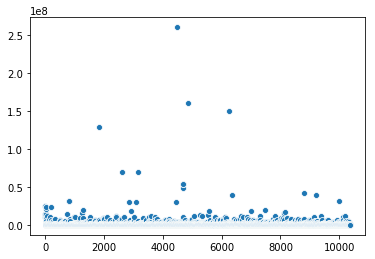

In [29]:
import seaborn as sns

# Boxplot for MEMBER_ANNUAL_INCOME
sns.scatterplot(data=data1["MEMBER_ANNUAL_INCOME"] )

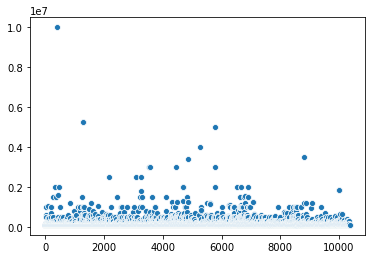

In [30]:
# Boxplot for ANNUAL_FEES
sns.scatterplot(data=data1['ANNUAL_FEES'] )

We see that there are some outliers in both numerical columns ie `ANNUAL_FEES` and `MEMBER_ANNUAL_INCOME` we will remove the maximum value from both the columns as they might induce biasness. Although, there are other values which are outside the bounds and will be kept intact because they tend to make their own cluster. Hence, they might help in a different theory altogether because as we know some clubs do provide special membership plans for their prestigious and rich customers. 

In [31]:
data1["MEMBER_ANNUAL_INCOME"].max()

260000004.0

In [32]:
data1["ANNUAL_FEES"].max()

10000000.0

In [33]:
#data1 = data1[data1["MEMBER_ANNUAL_INCOME"] != 260000004.0]
#data1 = data1[data1["ANNUAL_FEES"] != 10000000.0]

In [34]:
level_mapping = {1.0: 'One', 2.0: 'Two', 3.0: 'Three', 4.0: 'Four', 5.0: 'Five', 6.0: 'Six'}

In [35]:
data1['MEMBER_OCCUPATION_CD'] = data1['MEMBER_OCCUPATION_CD'].replace(level_mapping)

data1.head(5)

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,29,113125.0,M,M,25200000.0,One,TYPE-B,45,2,ANNUAL,477,INFORCE,2006-09-14,1
1,38,112220.0,M,M,10339200.0,One,TYPE-B,36,3,QUARTERLY,255,INFORCE,2006-11-02,1
2,12,100000.0,M,M,14400000.0,One,TYPE-B,42,1,ANNUAL,7866,INFORCE,2007-01-24,1
3,12,100000.0,M,M,9000000.0,One,TYPE-B,39,2,ANNUAL,200533,INFORCE,2007-01-22,1
4,46,100000.0,M,M,4800000.0,One,TYPE-B,27,2,QUARTERLY,6988,INFORCE,2007-01-31,1


We integer encoded the `MEMBER_OCCUPATION_CD` as we know Occupation 2 is not twice the Occupation 1 and this is the reason we integer encoded the perticular column as Algorithm might interpret so.

In [36]:
print(data1['ANNUAL_FEES'].value_counts())

100000.00    2506
200000.00     348
150000.00     276
120000.96     202
100000.80     148
             ... 
309579.27       1
103724.76       1
121797.96       1
125405.52       1
102400.00       1
Name: ANNUAL_FEES, Length: 2068, dtype: int64


In [37]:
print(data1['MEMBER_ANNUAL_INCOME'].value_counts())

399996.0       536
999996.0       507
300000.0       505
500004.0       491
600000.0       446
              ... 
6464172.0        1
11355492.0       1
383532.0         1
636000.0         1
150000000.0      1
Name: MEMBER_ANNUAL_INCOME, Length: 691, dtype: int64


We see that we have START_DATE and END_DATE columns which are time based data columns and would not prove a beneficial component towards our analysis to predict the customers who might be retained by the club. Hence, we would remove those features from our data. 

Moreover, We see that we have AGENT_CODE we do consider the fact that any feature that is not relevant for “learning” needs to be removed hence we find that a customer cancelling a membership or being a member does not depend upon the Agent through which they have enrolled through. So, We will remove this feature as well.

In [38]:
data2 = data1.drop(columns = ['START_DATE', 'END_DATE', 'AGENT_CODE'])
data2.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.0,M,M,25200000.0,One,TYPE-B,45,2,ANNUAL,INFORCE
1,38,112220.0,M,M,10339200.0,One,TYPE-B,36,3,QUARTERLY,INFORCE
2,12,100000.0,M,M,14400000.0,One,TYPE-B,42,1,ANNUAL,INFORCE
3,12,100000.0,M,M,9000000.0,One,TYPE-B,39,2,ANNUAL,INFORCE
4,46,100000.0,M,M,4800000.0,One,TYPE-B,27,2,QUARTERLY,INFORCE


In [39]:
data3 = data2.drop(columns = 'MEMBERSHIP_STATUS')

In [40]:
target = data2['MEMBERSHIP_STATUS']

In [41]:
data3.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE
0,29,113125.0,M,M,25200000.0,One,TYPE-B,45,2,ANNUAL
1,38,112220.0,M,M,10339200.0,One,TYPE-B,36,3,QUARTERLY
2,12,100000.0,M,M,14400000.0,One,TYPE-B,42,1,ANNUAL
3,12,100000.0,M,M,9000000.0,One,TYPE-B,39,2,ANNUAL
4,46,100000.0,M,M,4800000.0,One,TYPE-B,27,2,QUARTERLY


In [42]:
target.head()

0    INFORCE
1    INFORCE
2    INFORCE
3    INFORCE
4    INFORCE
Name: MEMBERSHIP_STATUS, dtype: object

# Data Preprocessing <a> </a>

&gt; We will now use One-Hot-Encoding on the categorical features because machine learning algorithms cannot work with categorical data directly. Therefore, The categories must be converted into numbers.

In [43]:
# get the list of categorical descriptive features
categorical_cols = data3.columns[data3.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(data3[col].unique())
    if (n == 2):
        data3[col] = pd.get_dummies(data3[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
data3 = pd.get_dummies(data3)

In [44]:
data3.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBER_MARITAL_STATUS_D,MEMBER_MARITAL_STATUS_M,MEMBER_MARITAL_STATUS_S,MEMBER_MARITAL_STATUS_W,MEMBER_OCCUPATION_CD_Five,MEMBER_OCCUPATION_CD_One,MEMBER_OCCUPATION_CD_Two,PAYMENT_MODE_ANNUAL,PAYMENT_MODE_MONTHLY,PAYMENT_MODE_QUARTERLY,PAYMENT_MODE_SEMI-ANNUAL,PAYMENT_MODE_SINGLE-PREMIUM
0,29,113125.0,1,25200000.0,1,45,2,0,1,0,0,0,1,0,1,0,0,0,0
1,38,112220.0,1,10339200.0,1,36,3,0,1,0,0,0,1,0,0,0,1,0,0
2,12,100000.0,1,14400000.0,1,42,1,0,1,0,0,0,1,0,1,0,0,0,0
3,12,100000.0,1,9000000.0,1,39,2,0,1,0,0,0,1,0,1,0,0,0,0
4,46,100000.0,1,4800000.0,1,27,2,0,1,0,0,0,1,0,0,0,1,0,0


We scaled the descriptive feaatures to be between 0 and 1 so as to easily be processed by the Algorithms. Also, it will convert the dataframe in pandas to numpy which makes it easier to work with the scikit-learn as it is built on numpy.

In [45]:
from sklearn.preprocessing import RobustScaler
Data = data3.copy()

Data = preprocessing.MinMaxScaler().fit_transform(Data)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
print(type(Data))

<class 'numpy.ndarray'>


In [47]:
target_encoded = np.where(target=='CANCELLED', 1, 0)

#le = preprocessing.LabelEncoder()
#le_fit = le.fit(target)
#target_encoded = le_fit.transform(target)

np.unique(target_encoded, return_counts = True)

(array([0, 1]), array([4937, 2338]))

In [48]:
print(type(target_encoded))

<class 'numpy.ndarray'>


In [49]:
print(target_encoded)

[0 0 0 ... 0 0 0]


## Data Exploration <a> </a>

We will first see the age groups who have enrolled in the membership and analyse the proportion of the people who are more involved in the membership programs.

For this we will divide the people in the age groups of Young, Middle-Aged and Elderly.

In [50]:
data2['MEMBER_AGE_AT_ISSUE'].max()

78

In [51]:
data2['MEMBER_AGE_AT_ISSUE'].min()

18

In [52]:
data2_cat = data2.copy()
data2_cat['MEMBER_AGE_AT_ISSUE'] = pd.cut(data2_cat['MEMBER_AGE_AT_ISSUE'],bins=[17,35,55,79],labels=['Young','Middle-Aged','Elderly'])
data2_cat.head()

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,MEMBERSHIP_STATUS
0,29,113125.0,M,M,25200000.0,One,TYPE-B,Middle-Aged,2,ANNUAL,INFORCE
1,38,112220.0,M,M,10339200.0,One,TYPE-B,Middle-Aged,3,QUARTERLY,INFORCE
2,12,100000.0,M,M,14400000.0,One,TYPE-B,Middle-Aged,1,ANNUAL,INFORCE
3,12,100000.0,M,M,9000000.0,One,TYPE-B,Middle-Aged,2,ANNUAL,INFORCE
4,46,100000.0,M,M,4800000.0,One,TYPE-B,Young,2,QUARTERLY,INFORCE


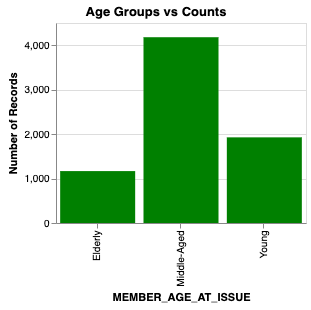

In [53]:
alt.data_transformers.disable_max_rows()
alt.Chart(data2_cat, title='Age Groups vs Counts').mark_bar(color='green').encode(x='MEMBER_AGE_AT_ISSUE', y='count()').properties(width=250)

We grouped the `MEMBER_AGE_AT_ISSUE` into:

- Young: Below 36
- Middle-Aged: between 35 and 55
- Elderly: 56 and above

In our dataset, we have about 4000 Members who are *Middle-Aged* which is twice as compared to the Young group and about 4 times as compared to the Elderly People who have been or still hold the membership of the club. 

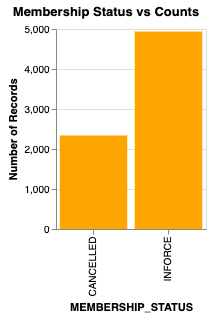

In [54]:
alt.data_transformers.disable_max_rows()
alt.Chart(data2_cat, title='Membership Status vs Counts').mark_bar(color='orange').encode(x='MEMBERSHIP_STATUS', y='count()').properties(width=150)

We observe that we have about 5000 members who are still enrolled to the club's Services while about 2200 have cancelled their membership in past.

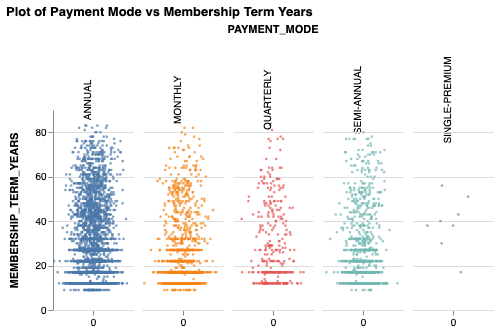

In [55]:
stripplot =  alt.Chart(data2_cat, title='Plot of Payment Mode vs Membership Term Years', width=80, ).mark_circle(size=6).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=True),
        scale=alt.Scale(),
    ),
    y=alt.Y('MEMBERSHIP_TERM_YEARS:Q'),
    color=alt.Color('PAYMENT_MODE:N', legend=None),
    column=alt.Column(
        'PAYMENT_MODE:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=5,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot.interactive()

From the above chart we see that the distribution of `MEMBERSHIP_TERM_YEARS` is almost similar in all the `PAYMENT_MODE` except for *Single-Premium* payment type. The members enrolled in *Single-Premium* are so few that we can count them which is **8**. Also, We observe that more customers prefer the *Annual* fees as compared to the *Monthly* fees payment method. *Semi-Annual* payments are less popular than *Monthly* payments but less as compared to the *Quarterly* payment method.

Although the distribution is almost similar but *Annual* `PAYMENT_MODE` has the Maximum term Years of **83** years but the minimum term years of **9** can be seen in other payment modes as well.

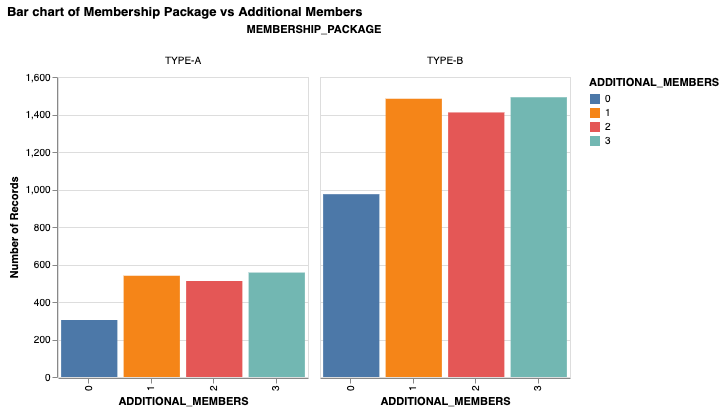

In [56]:
alt.Chart(data2_cat, title="Bar chart of Membership Package vs Additional Members").mark_bar().encode(
    x='ADDITIONAL_MEMBERS:N',
    y='count(ADDITIONAL_MEMBERS):Q',
    color='ADDITIONAL_MEMBERS:N',
    column='MEMBERSHIP_PACKAGE:N'
).properties(height=300, width=250)



From the chart above, we find that the package where additional members are eligible to use the club's facility is more popular as compared to the package in which no additional member is eligible to use the club's facility. Moreover, `MEMBERSHIP_PACKAGE` *TYPE-B* is considered by the members over *TYPE-A*.

Aditionally, packages which include 1 or 3 members are liked by maximum members. 

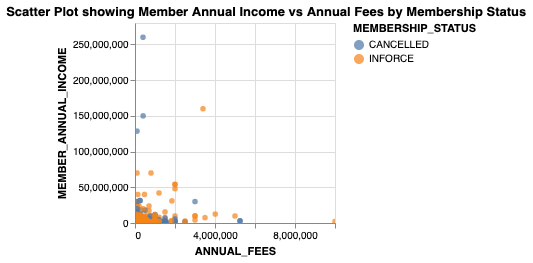

In [57]:
alt.Chart(data2_cat, title='Scatter Plot showing Member Annual Income vs Annual Fees by Membership Status').mark_circle().encode(
    x='ANNUAL_FEES:Q',
    y='MEMBER_ANNUAL_INCOME:Q',
    color='MEMBERSHIP_STATUS:N',
).interactive()



We see that most of the members have their `ANNUAL_FEES` of 100000 while others seem to have a customized packages. Moreover, The members whose membership is still *inforce* overshadows the members who have *cancelled* their memberships. 

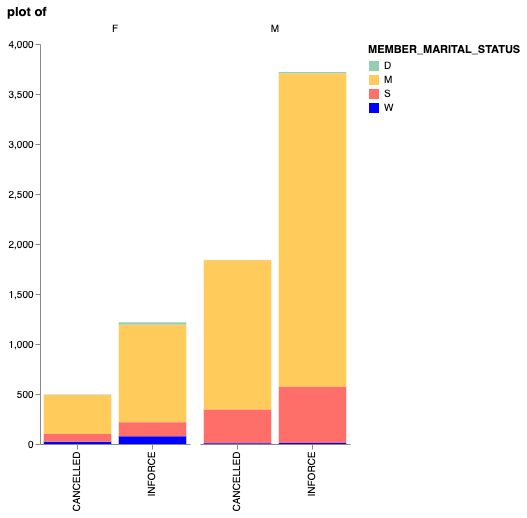

In [58]:
alt.Chart(data2_cat, title="plot of ").mark_bar().encode(
    x=alt.X('MEMBERSHIP_STATUS:N', title=None),
    y=alt.Y('count(MEMBER_MARITAL_STATUS):Q', axis=alt.Axis(grid=False, title=None)),
    column=alt.Column('MEMBER_GENDER:N', title=None),
    color=alt.Color('MEMBER_MARITAL_STATUS:N', scale=alt.Scale(range=['#96ceb4', '#ffcc5c','#ff6f69', '#0000ff']))
).configure_view(
    strokeOpacity=0    
).properties(height=400, width=150)

We observe from above graph that there are more *Male* members than *Female* members and about 45-50% have cancelled the Membership. Also, We see that majority of the members are *Married* followed by *Singles* which is then further followed by a small fraction of either *Widow* or *Divorced* Marital Status. 

# Feature Selection and Ranking <a> </a>

In [59]:
## Using Random Forest Importance( RFI ) for feature selection
from sklearn.ensemble import RandomForestClassifier

num_features = 20
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target_encoded)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
fs_indices_rfi

array([ 3,  5,  1,  0,  6,  4,  2, 14, 17, 15, 12, 13, 16,  8,  9, 11, 10,
        7, 18])

In [60]:
best_features_rfi = data3.columns[fs_indices_rfi].values
best_features_rfi

array(['MEMBER_ANNUAL_INCOME', 'MEMBER_AGE_AT_ISSUE', 'ANNUAL_FEES',
       'MEMBERSHIP_TERM_YEARS', 'ADDITIONAL_MEMBERS',
       'MEMBERSHIP_PACKAGE', 'MEMBER_GENDER', 'PAYMENT_MODE_ANNUAL',
       'PAYMENT_MODE_SEMI-ANNUAL', 'PAYMENT_MODE_MONTHLY',
       'MEMBER_OCCUPATION_CD_One', 'MEMBER_OCCUPATION_CD_Two',
       'PAYMENT_MODE_QUARTERLY', 'MEMBER_MARITAL_STATUS_M',
       'MEMBER_MARITAL_STATUS_S', 'MEMBER_OCCUPATION_CD_Five',
       'MEMBER_MARITAL_STATUS_W', 'MEMBER_MARITAL_STATUS_D',
       'PAYMENT_MODE_SINGLE-PREMIUM'], dtype=object)

In [61]:
## Importance measure
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.2521133 , 0.2428875 , 0.1597479 , 0.14600247, 0.05286179,
       0.03320685, 0.02507265, 0.01504077, 0.01235437, 0.01153121,
       0.01010912, 0.00953085, 0.00770535, 0.00601828, 0.0058471 ,
       0.00584267, 0.00256402, 0.00109248, 0.00047132])

In [62]:
#!pip install vega_datasets

In [63]:
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

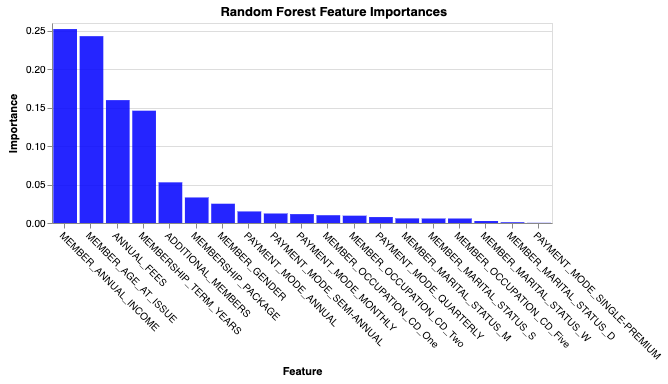

In [64]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

We find that the most important feature is MEMBER_ANNUAL_INCOME followed by MEMBER_AGE_AT_ISSUE, ANNUAL_FEES, MEMBERSHIP_TERM_YEARS, ADDITIONAL_MEMBERS and so on.

# Spliting Data into Training and Test Sets <a> </a>

The data when imported had 10362 instances which when cleaned were left with 7275 instances.

Now, The Descriptive features and the target feature are split into a training set and a test set by a ratio of 60:40. That is, we use 60 % of the data to build a classifier and evaluate its performance on the test set. We stratified the target feature because the proportion of both the classes *INFORCE* and *CANCELLED* is in the ratio of 4937/2338 which should not disproportionate while after splitting.

In [65]:
Data_train, Data_test, \
target_train, target_test = train_test_split(Data, 
                               target_encoded, 
                               test_size = 0.4, 
                               random_state=999, 
                               stratify = target_encoded)

print(Data_train.shape)
print(Data_test.shape)

(4365, 19)
(2910, 19)


# Model Fitting <a> </a>

Since we have a binary classification problem where the positive class is *CANCELLED* and negetive class is *INFORCE* because of the reason that we need to know the customers at risk then in that case we have a binary classification problem and the model built would be a "classifier".

The Supervised Learning Models we will use are:

- K-Nearest Neighbors (KNN)
- (Gaussian) Naive Bayes (NB)
- Decision Trees(DT)

## K-Nearest Neighbors (KNN) <a> </a>

We will try the Nearest Neighbor Classifier with 2 neighbors using Manhattan Distance.

In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, p=1)
knn_classifier.fit(Data_train, target_train);
knn_classifier.score(X=Data_test, y=target_test)

0.6597938144329897

We recieved an Accuracy rate of 65.9% in this case of test data with KNN model with 2 neighbors.

## Decision Trees(DT) <a> </a>

We will fit the Decision Tree Classifier with Maximum depth of 4 using Information Gain where the split criterion is *gini* on the training set.

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='gini',
                                       random_state = 333)
dt_classifier.fit(Data_train, target_train);
dt_classifier.score(Data_test, target_test)

0.6859106529209622

The correct predictions made on the test set by Decision Tree is accurate at a rate of 68.6%.

## (Gaussian) Naive Bayes (NB) <a> </a>

In [68]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(var_smoothing=10**(-3))
nb_classifier.fit(Data_train, target_train)
nb_classifier.score(Data_test, target_test)

0.5333333333333333

We observed that the (Gaussian) Naive Bayes accuracy on the test data is just 53.3% which is much lower as compared to the K-Nearest Neighbors and Decision Trees models. 

&gt; Even though from the above Model Fitting we see that the decision Tree gave the best result in terms of accuracy but we still cannot conclude upon this. So for this we will conduct a "paired t-test" so as to understand that the difference is statistically significant or not. But before that we will do Hyperparameter tuning to see if we can improve the models any better by changing some parameters or not.

## Model Evaluation Strategy <a> </a>

We will train and tune our models on 4365 rows of training data and test them on 2910 rows of test data. For each of the above models we will apply 5-fold stratified Cross-Validation with 3 repetitions for Hyperparameter tuning.

In [69]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

## Hyperparameter Tuning <a> </a>

We are going to use the *Pipeline* method to stack the grid search for KNN and Decision Tree tuning while Randomized search for Naive Bayes onto the feature selection for tuning via cross validation.

Above we have used random forest for feature selection because it is one of the powerful feature importance estimator we find for our dataset. But here we used it as a part of the pipeline as RFIFeatureSelector().

### K-Nearest Neighbors (KNN) <a> </a>

We know that the main parameters in KNN are the number of neighbors and distance metric(p) which are our hypertuning parameters.

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [71]:
from sklearn.pipeline import Pipeline

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 5, 10, 15, 20],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1) 

In [72]:
gs_pipe_KNN.fit(Data_train, target_train);

Fitting 15 folds for each of 30 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished


In [73]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 1, 'rfi_fs__n_features_': 10}

In [74]:
gs_pipe_KNN.best_score_

0.6677357770141276

In [75]:
gs_pipe_KNN.best_estimator_

Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=1,
           weights='uniform'))])

We observe that the optimal KNN model has a mean Accuracy Score of 0.667. The best performance of KNN is achieved by selected 10 features with 20 nearest neighbors and p = 1, which is the Manhattan Distance, a special form of Minkowski Distance.

We will now have a look at other combinations on other models for improved results to see if there is any significant difference.

In [76]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [77]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
24,0.667732,0.012819,0.685355,0.645642,20.0,1.0,10.0
26,0.667731,0.010847,0.684211,0.648339,20.0,1.0,19.0
25,0.667731,0.010847,0.684211,0.648339,20.0,1.0,20.0
27,0.667124,0.013756,0.689931,0.644165,20.0,2.0,10.0
29,0.665746,0.014452,0.692220,0.641466,20.0,2.0,19.0


We observe that the difference between the hyperparameter combinations is not really much when conditioned on the number of features selected. Let's visualize the results of the grid search corresponding to 10 selected features.

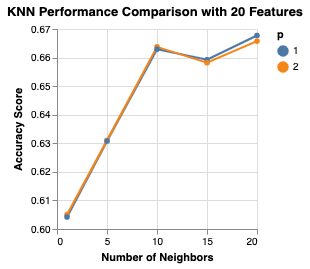

In [78]:
results_KNN_20_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_KNN_20_features, 
          title='KNN Performance Comparison with 20 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p'))

## (Gaussian) Naive Bayes (NB) <a> </a>

In the Gaussian Naive Bayes model we will try optimizing the var_smoothing which is the Laplace smoothing. We will grid search over the logspace(over the powers of 10). We will start with 10 and end with 10^(-3) with 500 different values. but we will perform randomized search over 100 different values for shorter run time.

We will power transformation since Naive Bayes require features to follow Gaussian Distribution.

In [79]:
from sklearn.preprocessing import PowerTransformer
Data_train_transformed = PowerTransformer().fit_transform(Data_train)

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=500)}

n_iter_search = 100
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          scoring='accuracy',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_train_transformed, target_train);

#-----------------------------
#         Tried Running the GRID SEARCH but computation was very 
#         high but result was same as RANDOMIZED SEARCH
#-----------------------------
#gs_pipe_NB = GridSearchCV(estimator=pipe_NB,
#                                param_grid=params_pipe_NB,
#                                cv=cv_method,
#                                refit=True,
#                                n_jobs=-1,
#                                scoring='accuracy',
#                                verbose=1)

#-----------------------------

#Output:
#Fitting 15 folds for each of 600 candidates, totalling 9000 fits
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
#[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.0s
#[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
#[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
#[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.2min
#[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 12.7min
#[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 18.1min
#[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 24.4min
#[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 31.7min
#[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 40.1min
#[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 49.4min
#[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 59.8min
#[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 71.2min
#[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 83.6min
#[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 88.9min finished

#------------------------------

#gs_pipe_NB.best_params_
#{'nb__var_smoothing': 3.001835813575589, 'rfi_fs__n_features_': 20}

#-------------------------------

#gs_pipe_NB.best_score_
#0.679725085910653

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.2min finished


In [81]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 19, 'nb__var_smoothing': 3.303985069871858}

In [82]:
gs_pipe_NB.best_score_

0.6795723558610156

The optimal NB yiels an Accuracy score of 0.679 (with all the features) - slightly higher than that of KNN. At this point, we cannot conclude NB outperforms KNN. We need to perform a paired t-test on the test data.

In [83]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
55,0.679572,0.002431,0.682703,0.674312,19.0,3.303985
56,0.679418,0.004100,0.684211,0.668578,20.0,2.903527
94,0.679418,0.004078,0.684211,0.668578,19.0,2.957617
2,0.679344,0.001555,0.682703,0.676201,20.0,3.690917
70,0.678655,0.004122,0.684994,0.669725,19.0,3.126007


The graph is as shown below of the var. smoothing vs Accuracy Scores.

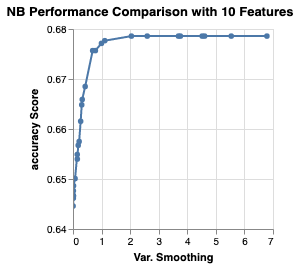

In [84]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='accuracy Score', scale=alt.Scale(zero=False))
).interactive()

## Decision Trees(DT) <a> </a>

We will use gini index to maximize information gain. We will determine the best combination of maximum depth and minimum split.

In [85]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(random_state=111))])

params_pipe_DT = {'dt__criterion': ['gini', 'entropy'],
                  'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          scoring='accuracy',
                          verbose=1) 

gs_pipe_DT.fit(Data_train, target_train);

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.6min finished


In [86]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 5,
 'dt__min_samples_split': 2,
 'rfi_fs__n_features_': 10}

In [87]:
gs_pipe_DT.best_score_

0.6881252386407025

The best parameters for the Decision Treee has a maximum depth of 5 and minimum split of 2 and with 10 features with Accuracy at 68.8%.

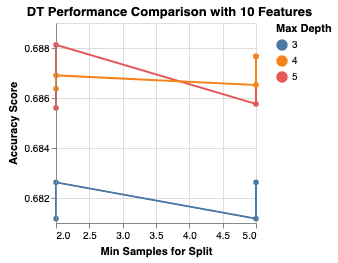

In [88]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

### Further Fine Tuning

#### Decision Tree

In [89]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150, 1000, 10000]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          scoring='accuracy',
                          verbose=1) 

gs_pipe_DT2.fit(Data_train, target_train);

Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished


In [90]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 50, 'rfi_fs__n_features_': 10}

In [91]:
gs_pipe_DT2.best_score_

0.6878197785414281

The best parameters for the Decision Treee has a maximum depth of 5 and minimum split of 50 with Accuracy at 68.7% with 10 selected featurees

In [92]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
1,0.687820,0.010757,0.709862,0.664376,5.0,50.0,10.0
0,0.685988,0.011406,0.708716,0.659794,5.0,5.0,10.0
2,0.683390,0.011931,0.705275,0.654817,5.0,100.0,10.0
16,0.682014,0.007733,0.697941,0.661697,15.0,1000.0,10.0
10,0.682014,0.007733,0.697941,0.661697,10.0,1000.0,10.0


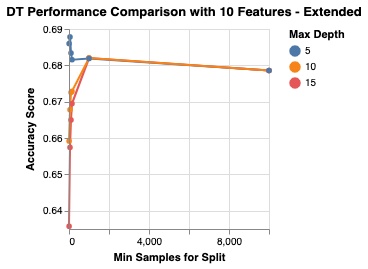

In [93]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

# Performance Comparison <a> </a>

Now since we have hypertuned our parameters by training within the cross-validation framework. 

We will now fit each of the tuned classifier on the 2910 rows in the test data in the same way of cross-validation to figure out which classifier performed better.

We know that cross vaalidation is a random process so we will to a pairwise t-tests to find any tweak or lag in the pairs of classifiers to know which are statistically signifant and which are not.

We will to paired t-test for the Accuracy scores between the following tuned classifier combinations:

- KNN vs NB
- DT vs KNN
- NB vs DT

# Discussion <a> </a>

We could not conduct a proper analysis as most of the rows had to be removed because they could induce biasness. If we would have been provided adequate knowledge about why the values were missing and what are the reasons that the 

***From hyperparameter tuning we are selecting the best feature as Decision Tree with maximum depth of 5 and minimum split of 50 with 10 features selected.***

In [94]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_KNN.mean()

0.6721776098252243

In [95]:
Data_test_transformed = PowerTransformer().fit_transform(Data_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_test_transformed,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_NB.mean()

0.6804085970713273

In [96]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_DT.mean()

0.6667217760982523

In [97]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=-2.0566382517184922, pvalue=0.0698592717646444)
Ttest_relResult(statistic=-0.688383485101661, pvalue=0.5085646563175696)
Ttest_relResult(statistic=-1.7922272313409948, pvalue=0.10669463311568582)


In [98]:
pred_KNN = gs_pipe_KNN.predict(Data_test)

In [99]:
Data_test_transformed = PowerTransformer().fit_transform(Data_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [100]:
pred_DT = gs_pipe_DT2.predict(Data_test)

In [101]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1975
           1       0.50      0.14      0.21       935

   micro avg       0.68      0.68      0.68      2910
   macro avg       0.60      0.54      0.51      2910
weighted avg       0.63      0.68      0.61      2910


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1975
           1       0.76      0.02      0.03       935

   micro avg       0.68      0.68      0.68      2910
   macro avg       0.72      0.51      0.42      2910
weighted avg       0.71      0.68      0.56      2910


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.94      0.80      1975
           1       0.52      0.13      0.20       935

   micro avg       0.68      0.68      0.68      2910
  

The confusion Matrices are as below:

In [102]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[1846  129]
 [ 807  128]]

Confusion matrix for Naive Bayes
[[1970    5]
 [ 919   16]]

Confusion matrix for Decision Tree
[[1866  109]
 [ 818  117]]


# References <a> </a>

Kaggle.com. 2020. Club Data Set. [online] Available at: &lt;https: club-data-set?="" sonannguyenngoc="" www.kaggle.com=""&gt; [Accessed 31 May 2020].&lt;/https:&gt;